In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.stats import zscore
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("Bike_sharing.csv")
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
#as date is in float so dropping the column date
data=data.drop(["dteday"],axis=1)

In [4]:
data.dtypes

instant         int64
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [5]:
data.keys()

Index(['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [6]:
data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [7]:
data.isnull().sum()

instant       0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

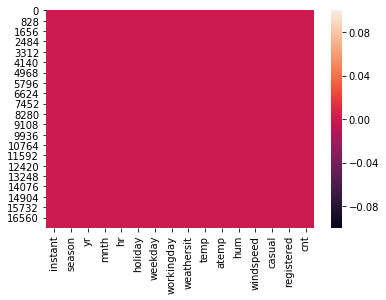

In [8]:
sns.heatmap(data.isnull())

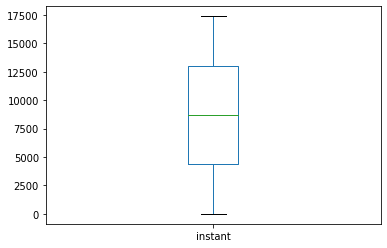

In [9]:
data["instant"].plot.box()

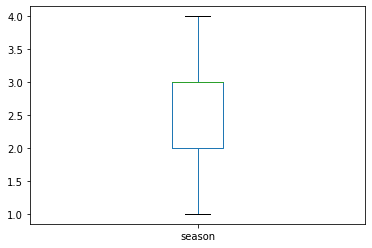

In [10]:
data["season"].plot.box()

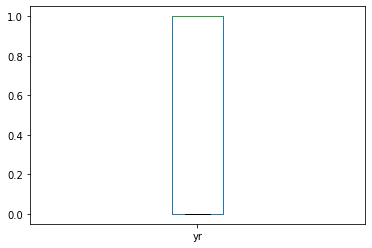

In [11]:
data["yr"].plot.box()

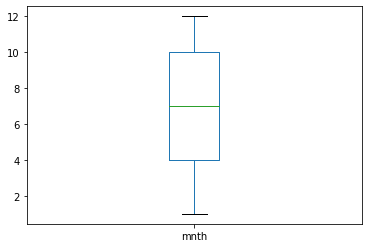

In [12]:
data["mnth"].plot.box()

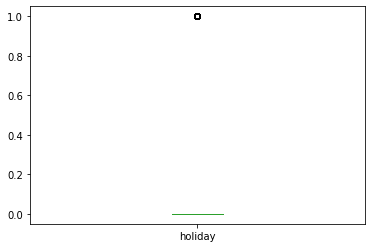

In [13]:
data["holiday"].plot.box()

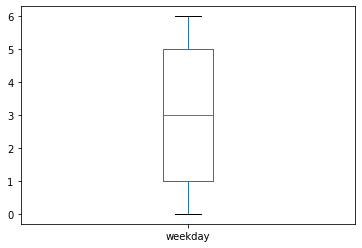

In [14]:
data["weekday"].plot.box()

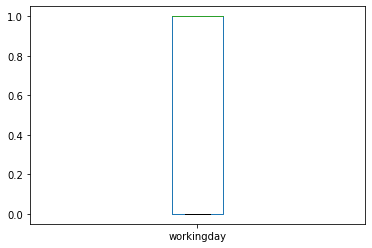

In [15]:
data["workingday"].plot.box()

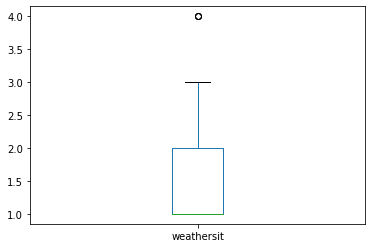

In [16]:
data["weathersit"].plot.box()

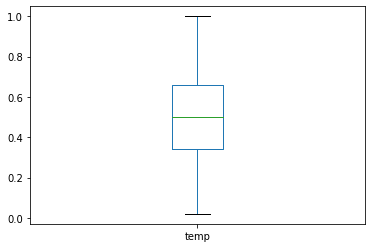

In [17]:
data["temp"].plot.box()

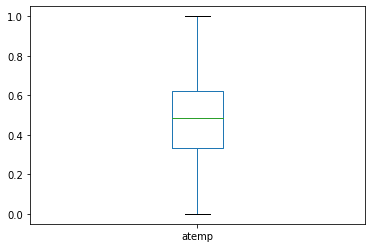

In [18]:
data["atemp"].plot.box()

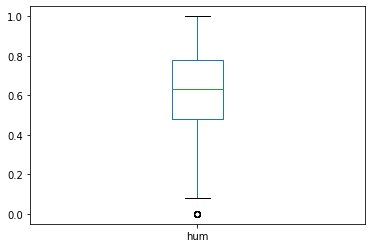

In [19]:
data["hum"].plot.box()

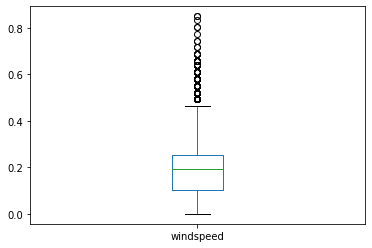

In [20]:
data["windspeed"].plot.box()

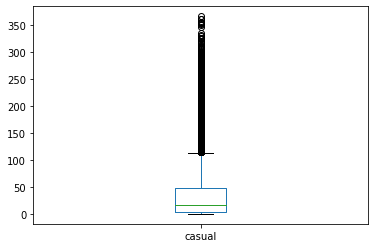

In [21]:
data["casual"].plot.box()

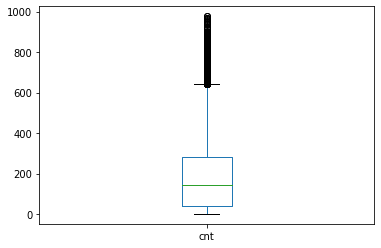

In [22]:
data["cnt"].plot.box()

In [23]:
from scipy.stats import zscore
z=abs(zscore(data))
df=data[(z<3).all(axis=1)]
df.head()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [24]:
print(data.shape)
print(df.shape)

(17379, 16)
(15934, 16)


In [25]:
#sns.pairplot(df)

In [26]:
x=df.drop("cnt",axis=1)

In [27]:
x.head()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13
1,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32
2,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27
3,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10
4,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1


In [28]:
x.shape

(15934, 15)

In [29]:
y=df["cnt"]

In [30]:
y.shape

(15934,)

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=scaler.fit_transform(x.astype(float))
x=pd.DataFrame(x)
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.000000,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.224490,0.292344,0.793478,0.0,0.016393,0.021488
1,0.000058,0.0,0.0,0.0,0.043478,0.0,1.0,0.0,0.0,0.204082,0.276909,0.782609,0.0,0.043716,0.052893
2,0.000115,0.0,0.0,0.0,0.086957,0.0,1.0,0.0,0.0,0.204082,0.276909,0.782609,0.0,0.027322,0.044628
3,0.000173,0.0,0.0,0.0,0.130435,0.0,1.0,0.0,0.0,0.224490,0.292344,0.728261,0.0,0.016393,0.016529
4,0.000230,0.0,0.0,0.0,0.173913,0.0,1.0,0.0,0.0,0.224490,0.292344,0.728261,0.0,0.000000,0.001653


In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.21,random_state=21)

In [33]:
x_train.shape

(12587, 15)

In [34]:
y_train.shape

(12587,)

In [35]:
lm=LinearRegression()

In [36]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
lm.intercept_

-3.694822225952521e-13

In [38]:
lm.coef_

array([ 8.17693019e-13, -1.76665029e-13, -4.65095122e-13, -4.63182878e-13,
        3.56611875e-13, -7.81597009e-14, -1.07441337e-13,  1.25647653e-13,
       -4.72632920e-13,  2.10521909e-13, -2.03742813e-15,  4.67595294e-13,
        1.13723603e-13,  1.83000000e+02,  6.05000000e+02])

In [39]:
lm.score(x_train,y_train)

1.0

In [40]:
pred=lm.predict(x_test)

In [41]:
print("Predicted Result:",pred)

Predicted Result: [285. 325.   3. ... 646. 195. 351.]


In [42]:
print("Actual:",y_test)

Actual: 12084    285
11740    325
408        3
14974     12
16345    210
11055    479
17092     88
4105     172
7699      52
5636       1
14017     16
10245     62
10768    468
5071      20
7254     144
16734     11
15375    116
14482    526
3653       5
16454     94
8473      68
5262       5
12426    123
9997     331
11538     60
4095     221
3152     104
7523      15
14835    212
1701      99
        ... 
14339    434
6178      25
13941     14
5987      16
8961       5
5894       2
6309     361
4191     189
262       81
14511    207
6439     206
4496     121
464      166
2773     321
13920     43
16869    345
314       64
15701    443
6382     184
1087       8
4846     302
245       63
5454       7
5277     385
13560     50
5683     119
2353      39
13059    646
6406     195
12940    351
Name: cnt, Length: 3347, dtype: int64


In [43]:
from sklearn.metrics import mean_squared_error

In [44]:
print("Error")
print(mean_squared_error(y_test,pred))

Error
4.055143896988356e-26


In [45]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

1.0


In [46]:
#USing DecisionTree
max_r_score=0
for r_state in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=r_state)
    dtr=DecisionTreeRegressor()
    dtr.fit(x_train,y_train)
    preddtr=lm.predict(x_test)
    r2_scr=r2_score(y_test,preddtr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print('max r2 score corresponding to',final_r_state,"is",max_r_score) 

max r2 score corresponding to 0 is 1.0


In [47]:
#Applying DecisionTreeRegressor
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=0)
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr.score(x_train,y_train)

1.0

In [48]:
preddtr=dtr.predict(x_test)
print(r2_score(y_test,preddtr))

0.9994234586462619


In [49]:
print("RMSE is:", np.sqrt(mean_squared_error(y_test,preddtr)))

RMSE is: 3.60711739336985


In [50]:
#Saving the model
from sklearn.externals import joblib
joblib.dump(lm,"Bike_sahring25.pkl")

['Bike_sahring25.pkl']